# Project Name

## Goal:
- Objective 1
- Objective 2

# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import acquire as a
import wrangle as w
import keila_explore as ke
# import explore as e
# import model as m
# import evaluate as ev

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import unicodedata
import nltk
from wordcloud import WordCloud
import os
import json

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr, f_oneway, ttest_ind

np.random.seed(123)

# Acquire
- Data acquired from _____ (e.g. [data.world](https://data.world/food/wine_quality) )
- It contained xx rows and xx columns before cleaning
- Each row represents ____
- Each column represents ____

# Prepare
- Removed ...
- Renamed ...
- Checked for nulls ...
- Checked that column data types were appropriate ...
- Outliers ?
- Added target column?
- Added additional features?
- Encoded categorical variables
- Split data into train, validate, and test (60/20/20), stratifying ...
- Scaled continuous variables


# Data Dictionary

| Feature | Type | Definition |
|:--------|:-----|:-----------|
|feature_1 (target)|integer|definition 1|

In [2]:
## acquireing and preparing data for exploration
df = a.get_data_json()

df = w.clean_df(df, ["'", "&#9;"])

df = df.drop(columns=["clean","stemmed"])



In [3]:
## splitting data in to train, validate, and test
train, validate, test = w.split_data(df)

# A brief look at the data

In [4]:
train.head()

,repo,language,readme_contents,lemmatized,readme_length
70,inkling/Subliminal,Objective-C,"<p align=""center"" >\n <img src=""http://inklin...",p aligncenter img srchttpinklinggithubiosublim...,11215
59,microsoftarchive/android-sliding-layer-lib,Java,6Wunderkinder SlidingLayer for Android\n======...,6wunderkinder slidinglayer android repository ...,4266
92,jamesob/tinychain,Python,"# ⛼ tinychain\n\n*Putting the rough in ""[roug...",tinychain putting rough rough consensushttpsto...,8333
104,Cleveroad/CRNetworkButton,Swift,# CRNetworkButton [![Awesome](https://cdn.rawg...,crnetworkbutton awesomehttpscdnrawgitcomsindre...,5268
97,zhangxinxu/mobilebone,JavaScript,"mobilebone.js\n=============\n\n<img src=""http...",mobilebonejs img srchttpswwwzhangxinxucomgithu...,5908


## A summary of the data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 70 to 75
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             66 non-null     object
 1   language         66 non-null     object
 2   readme_contents  66 non-null     object
 3   lemmatized       66 non-null     object
 4   readme_length    66 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.1+ KB


In [6]:
train.describe()

,readme_length
count,66.000000
mean,9124.742424
std,25242.379029
min,251.000000
25%,2835.000000
50%,4877.500000
75%,6918.250000
max,206311.000000


# Explore

In [7]:
# split the words individually up and lemmatixe them                                                                                                                                                                                                                                                                                                            
git_lem_words =" ".join(train.lemmatized).split(" ")

lem_freq = pd.Series(git_lem_words).value_counts()

# create df of freq words
word_counts = pd.concat([lem_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ["lemmatize"]
word_counts

,lemmatize
rust,451
build,277
use,215
library,204
file,147
...,...
era,1
mitlicense,1
sendinputforcelogout,1
stateloggingin,1


## Question 0 Are there any words that uniquely identify a programming language?
- NOTE: this question is more of a look at the data, not a stats test question

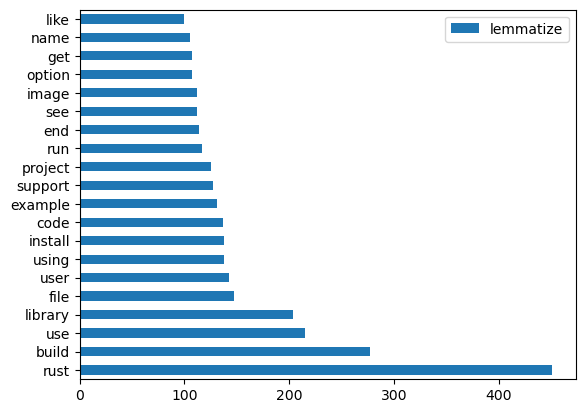

In [8]:
# Example: # get a boxplot and histplot of property_value of train
# Visualize Example: # get a regplot of squarefeet vs property_value on train
word_counts.sort_values("lemmatize", ascending=False)[["lemmatize"]].head(20).plot.barh();



* `pure, rust`, `rust, build` rust is a library for C language, which leads me to objective-c
* `install npm` npm is a package manager for the JavaScript programming language
* `library ruby` ruby is a language 

## Question 1 Are there bigrams or n-grams that can uniquely identify a programming language?

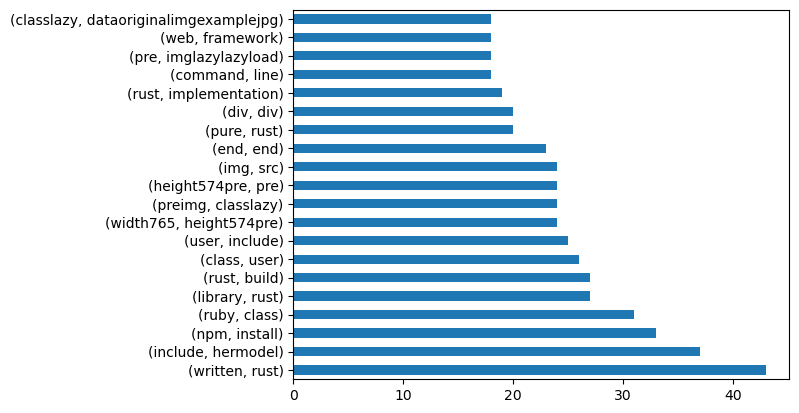

In [9]:
# Visualize Example: # get a regplot of squarefeet vs property_value on train

ke.make_ngram(git_lem_words, 2).head(20).plot.barh();

* `rust` library for C
* `ruby` ruby is a language

### Analyze feature_x vs target with stats
- $H_0$: There is NO relationship between feature_x and target
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Example 1: Utilize pearsonr - we are comparing continuous variables, normally distributed
    - Example 2:Comparing a categorical to a continuous variable, normally distributed, and equal variance
        - Testing if property value of has_pool == 1 is signicantly greater than has_pool == 0:  one-tail ttest
        - Utilize f_oneway
    - Many other stats tests

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between feature_x and target (and maybe more description)

## Question 2 (e.g. Is feature_x associated with target?)

In [10]:
# Visualize Example: # get a regplot of squarefeet vs property_value on train
## INSERT CODE HERE

### Analyze feature_x vs target with stats
- $H_0$: There is NO relationship between feature_x and target
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Example 1: Utilize pearsonr - we are comparing continuous variables, normally distributed
    - Example 2:Comparing a categorical to a continuous variable, normally distributed, and equal variance
        - Testing if property value of has_pool == 1 is signicantly greater than has_pool == 0:  one-tail ttest
        - Utilize f_oneway
    - Many other stats tests

In [11]:
# get the stats from a pearsonr test on feature_x vs target
## INSERT CODE HERE

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between feature_x and target (and maybe more description)

## Question 3 (e.g. Is feature_x associated with target?)

In [12]:
# Visualize Example: # get a regplot of squarefeet vs property_value on train
## INSERT CODE HERE

### Analyze feature_x vs target with stats
- $H_0$: There is NO relationship between feature_x and target
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Example 1: Utilize pearsonr - we are comparing continuous variables, normally distributed
    - Example 2:Comparing a categorical to a continuous variable, normally distributed, and equal variance
        - Testing if property value of has_pool == 1 is signicantly greater than has_pool == 0:  one-tail ttest
        - Utilize f_oneway
    - Many other stats tests

In [13]:
# get the stats from a pearsonr test on feature_x vs target
## INSERT CODE HERE

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between feature_x and target (and maybe more description)

## Question 4 (e.g. Is feature_x associated with target?)

In [14]:
# Visualize Example: # get a regplot of squarefeet vs property_value on train
# INSERT CODE HERE

### Analyze feature_x vs target with stats
- $H_0$: There is NO relationship between feature_x and target
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Example 1: Utilize pearsonr - we are comparing continuous variables, normally distributed
    - Example 2:Comparing a categorical to a continuous variable, normally distributed, and equal variance
        - Testing if property value of has_pool == 1 is signicantly greater than has_pool == 0:  one-tail ttest
        - Utilize f_oneway
    - Many other stats tests

In [15]:
# get the stats from a pearsonr test on feature_x vs target
## INSERT CODE HERE

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between feature_x and target (and maybe more description)

## Exploration Summary
* Plain English bullets as required

* Features that have a relationship with target (stats test for feature_y, feature_z, etc. completed on separate working notebook:
    * feature x ...
    * feature y
    * feature z


### (As Required) Features I am moving to modeling with

### (As Required) Features I am not moving to modeling with

# Modeling
* Evaluation Metrics (example: I will use R^2 and Root Mean Square Error (RMSE) as my evaluation metrics)
    * for R^2, the value is in the range 0-1; closer to 1.0 is better; baseline is 0.0
    * for RMSE, the lower the value the better; baseline is xxx
* The average target is xxx which is the baseline prediction
* I will evaluate x different model types and various hyperparameter configurations
    * (Example: The four model types are Ordinary Least Squares (OLS), LassoLars, Polynomial Regression, Generalized Linear Model (GLM))
* Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test

In [74]:
# import for model 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
def split_data_xy(train, validate, test, target="language"):
    '''
    This function take in a dataframe performs a train, validate, test split
    Returns train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test
    and prints out the shape of train, validate, test
    '''
    #Split into X and y
    x_train = train.lemmatized
    y_train = train[target]

    x_validate = validate.lemmatized
    y_validate = validate[target]

    x_test = test.lemmatized
    y_test = test[target]
    

    # Have function print datasets shape
    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')
   
    return train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test

In [85]:
## prep data for modeling
# get X y splits for modeling
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = ke.split_data_xy(train, validate, test)

# create baseline 
baseline_accuracy = (train.language == "other").mean()
round(baseline_accuracy, 2)

train -> (66, 5)
validate -> (22, 5)
test -> (22, 5)


0.23

In [86]:
# create bag of words
cv = CountVectorizer()
x_bow = cv.fit_transform(x_train)
x_validate_bow = cv.transform(x_validate)
x_test_bow = cv.transform(x_test)

## Model Name: DecisionTreeClassifier

In [87]:
#build my model
tree = DecisionTreeClassifier(max_depth=7, random_state=123)
tree.fit(x_bow, y_train)
tree.score(x_bow, y_train)

# get model results
print(f" Train Score: {tree.score(x_bow, y_train)}, Validation Score: {tree.score(x_validate_bow, y_validate)}")

 Train Score: 0.8939393939393939, Validation Score: 0.5


* model: DecisionTreeClassifier did beat baseline with approximately 27%

## Model: Random Forest

In [88]:
# get model results
#build my model
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=1, random_state=123)
rf.fit(x_bow, y_train)

# get model results
print(f" Train Score: {rf.score(x_bow, y_train)}, Validation Score: {rf.score(x_validate_bow, y_validate)}")

 Train Score: 0.9545454545454546, Validation Score: 0.3181818181818182


* model: Random Forest did beat baseline with approximately 8%

## Model: KNN

In [73]:
# get model results
#build my model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_bow, y_train)

# get model results
print(f" Train Score: {knn.score(x_bow, y_train)}, Validation Score: {knn.score(x_validate_bow, y_validate)}")

 Train Score: 0.5909090909090909, Validation Score: 0.36363636363636365


* model: KNN did beat baseline with approximately 13%

## Model: LogisticRegression

In [79]:
# get model results
logit = LogisticRegression(random_state=123)
logit.fit(x_bow, y_train)

# get model results
print(f" Train Score: {logit.score(x_bow, y_train)}, Validation Score: {logit.score(x_validate_bow, y_validate)}")

 Train Score: 1.0, Validation Score: 0.5


* model: LogisticRegression did beat baseline with approximately 18%

## Comparing Models
* summarize the model performance
* DecisionTreeClassifier did beat baseline with approximately 27%
* Random Forest did beat baseline with approximately 8%
* KNN did beat baseline with approximately 13%
* I have chosen to move forward with the DecisionTree model on test

## Best Model (model name) on Test

In [84]:
# get test results for final model
tree.score(x_test_bow, y_test)

0.6363636363636364

## Modeling Summary
* The model outperformed the baseline by 40%

# Conclusions

## Exploration
* bullets

## Modeling
* bullets

## Recommendations
* bullets

## Next steps
* bullets